In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np

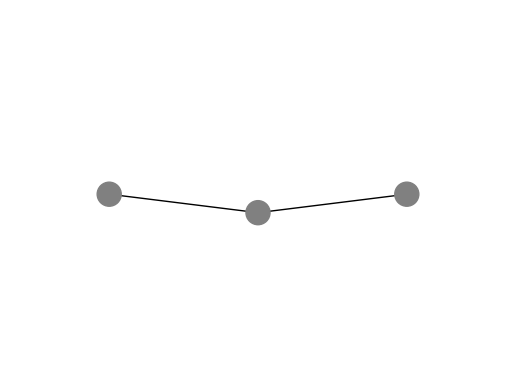

In [106]:
G = nx.Graph()
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_edge("A","B")
G.add_edge("B","C")


pos = {
    "A": np.array([-.6,0]),
    "B": np.array([0,-.1]),
    "C": np.array([.6,0]),
}

# [,[0,-.1],[.6,0]]

fig, ax = plt.subplots()

nx.draw(G, pos = pos, ax = ax, node_color = ["gray","gray","gray"])
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
# ax.axis("on")
# ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

In [ ]:
G = nx.Graph()
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_edge("A","C")
G.add_edge("B","C")


pos = {
    "A": np.array([-.6,-.6]),
    "B": np.array([.6,.6]),
    "C": np.array([-.2,.2]),
}


fig, ax = plt.subplots()

nx.draw(G, pos = pos, ax = ax, node_color = ["gray","gray","gray"])
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
# ax.axis("on")
# ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

In [109]:
from models.layers.layers import EctConfig, EctLayer
from torch_geometric.data import Data, Batch

NUM_THETAS = 16

V = torch.vstack(
    [
        torch.sin(torch.linspace(0, 2*torch.pi, NUM_THETAS)),
        torch.cos(torch.linspace(0, 2*torch.pi, NUM_THETAS)),
    ]
)

points_0 = torch.tensor([[-.6,0],[.6,0]])
points_1 = torch.tensor([[-.6,0],[0,-.1],[.6,0]])

edges_0 = torch.tensor([[0],[1]])
edges_1 = torch.tensor([[0,1],
                        [1,2]])

layer = EctLayer(EctConfig(device="cpu",num_features=2,bump_steps=NUM_THETAS,num_thetas=NUM_THETAS,ect_type="edges"),fixed=True)
layer.v = V

batch = Batch.from_data_list([Data(x=points_0,edge_index=edges_0),Data(x=points_1,edge_index=edges_1)])
res = layer(batch)


(-0.5, 15.5, 15.5, -0.5)

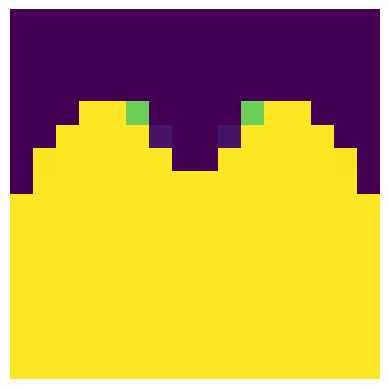

In [111]:
plt.imshow(res[0].detach().numpy())
plt.axis("off")